In [31]:
# 1. 라이브러리 불러오기

# pandas / numpy → 데이터 다루기
# matplotlib / seaborn → 데이터 시각화
# sklearn → 데이터 분할(train/test), 전처리(Label 인코딩, 스케일링)
# tensorflow.keras → 딥러닝 모델 만들기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout




In [32]:
# 2. 데이터 불러오기

file_path = "/content/drive/MyDrive/Colab Notebooks/breast_cancer.csv"

df = pd.read_csv(file_path)
print(df.head())
print(df.info())

   Unnamed: 0  mean radius  mean texture  mean perimeter  mean area  \
0           0        17.99         10.38          122.80     1001.0   
1           1        20.57         17.77          132.90     1326.0   
2           2        19.69         21.25          130.00     1203.0   
3           3        11.42         20.38           77.58      386.1   
4           4        20.29         14.34          135.10     1297.0   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   mean symmetry  ...  worst texture  worst perimeter  worst area  \
0         0.2419  ...          17.33     

In [39]:

# 3. Feature / Label 분리
label_col = "label"
X = df.drop(columns=[label_col])
y = df[label_col]

# 4. Label 인코딩 (B=0, M=1)
le = LabelEncoder()
y = le.fit_transform(y)   # (0/1 로 변환)

# 5. 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [34]:
# 결측치 확인
df.isnull().sum()

#결측치가 있다면 제거
#df = df.dropna()
#df.isnull().sum()

,0
Unnamed: 0,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0


In [35]:
# 레이블 확인
df['label'].value_counts()

,count
label,
1,357
0,212


In [36]:
# 6. 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. 모델 구성 (FC Layer만 사용)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류

# 8. 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# 9. 학습
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7105 - loss: 0.5448 - val_accuracy: 0.9341 - val_loss: 0.3328
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9155 - loss: 0.3344 - val_accuracy: 0.9560 - val_loss: 0.2281
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9129 - loss: 0.2593 - val_accuracy: 0.9670 - val_loss: 0.1729
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9464 - loss: 0.1914 - val_accuracy: 0.9670 - val_loss: 0.1377
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9308 - loss: 0.1817 - val_accuracy: 0.9670 - val_loss: 0.1154
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9619 - loss: 0.1259 - val_accuracy: 0.9670 - val_loss: 0.0976
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9611 - loss: 0.1443 - val_accuracy: 0.9670 - val_loss: 0.0818
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9606 - loss: 0.0973 - val_accuracy: 0.9780 - val_loss

✅ Test Accuracy: 0.9825


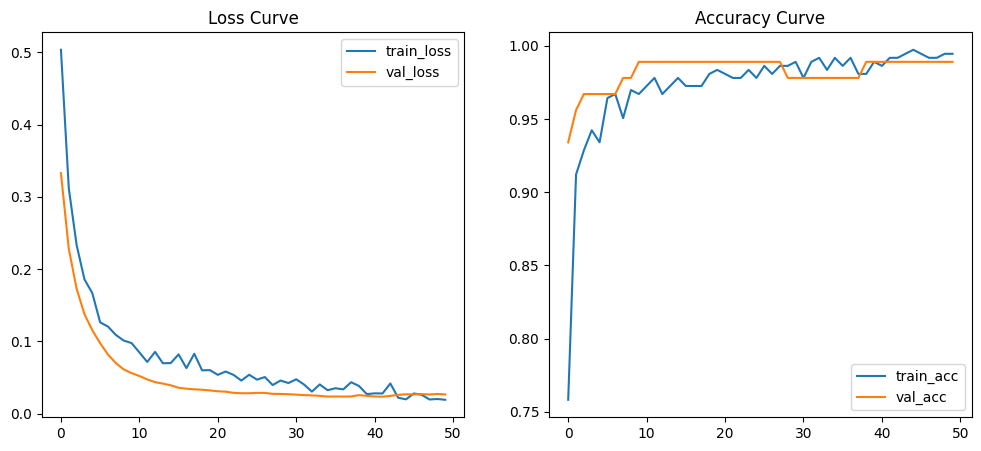

In [38]:
# 10. 평가
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {acc:.4f}")

# 11. 학습 곡선 시각화
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title("Accuracy Curve")
plt.show()